### 다항회귀를 이용한 과소적합 및 과대적합

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 변환
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

In [3]:
# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samles = 30
X = np.sort(np.random.rand(n_samles))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값
y = true_fun(X) + np.random.randn(n_samles)*0.1

Degree 1 coef_: -1.61
Degree 1 MSE: 0.40772896250986834
Degree 4 coef_: -17.79
Degree 4 MSE: 0.04320874987231747
Degree 15 coef_: -1874170.69
Degree 15 MSE: 182815433.47648773


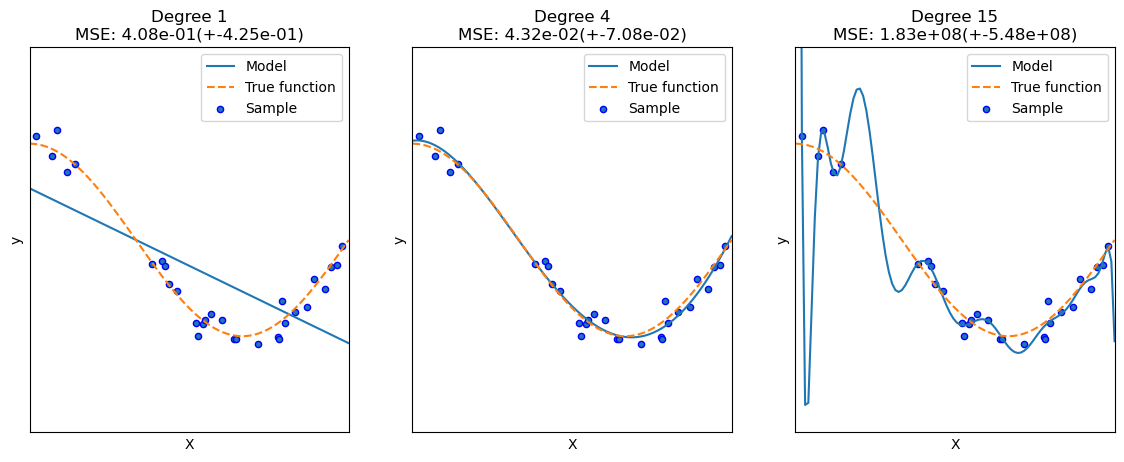

In [16]:
plt.figure(figsize=(14,5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변환시키면서 비교
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 polynomial 변환
    polynomial_feature = PolynomialFeatures(degree=degrees[i], include_bias=False)
    liner_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_feature', polynomial_feature), ('liner_regression', liner_regression)])
    pipeline.fit(X.reshape(-1,1), y)
    
    # 교차 검증으로 다항 회귀를 평가
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring="neg_mean_squared_error", cv=10)
    cofficients = pipeline.named_steps['liner_regression'].coef_
    
    print(f"Degree {degrees[i]} coef_: {cofficients[i]:.2f}")
    print(f"Degree {degrees[i]} MSE: {-1*np.mean(scores)}")
    
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), label='Model')
    plt.plot(X_test, true_fun(X_test), '--', label='True function')
    plt.scatter(X,y, edgecolors='b', s=20, label='Sample')
    
    plt.xlabel('X')
    plt.ylabel('y')
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend()
    plt.title(f"Degree {degrees[i]}\nMSE: {-scores.mean():.2e}(+-{scores.std():.2e})")
    
plt.show()